# Ninad Karlekar <br>
# Project Name — Market Basket Analysis in Python using Apriori Algorithm

## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Preparation
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Conclusion

## 1) Problem statement
- Market Basket Analysis in Python using Apriori Algorithm

## 2) Data Collection
- Dataset Source -
https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

### 2.1 Import Data and Required Packages

In [28]:
#Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings as wg
wg.filterwarnings("ignore")

### 2.2 Importing datasets

In [2]:
# File path of the dataset
file_path = 'Dataset/Online Retail.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first 5 rows of the dataset
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### Let's get stastical information about the dataset

In [3]:
#number of rows and columns
df.shape

(541909, 8)

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Get the column names of the DataFrame
column_names = df.columns

# Display the column names
print(column_names)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


### 2.3 Dataset information
- **InvoiceNo**: A unique identifier for each transaction.
- **StockCode**: A unique identifier for each product.
- **Description**: A description of the product.
- **Quantity**: The quantity of each product in a transaction.
- **InvoiceDate**: The date and time of each transaction.
- **UnitPrice**: The price of each product in the transaction.
- **CustomerID**: A unique identifier for each customer.
- **Country**: The country where the customer is located.

## 3. Data Checks to perform

- Check for proper format of data
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
#Ensure that the data type in the InvoiceNo column is in the form of a string.
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [7]:
df.sort_values('InvoiceNo', ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
...,...,...,...,...,...,...,...,...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom


`Transactions` with `InvoiceNo` starting with the letter **`'C'`** denote **canceled transactions**, and we will remove this data from our analysis as we are only interested in analyzing successful transactions.

In [8]:
'''
Create an indicator column stipulating whether the invoice number begins with 'C'
'''

df['Is_C_Present'] = (
    df['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0))

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Is_C_Present
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


### 3.1 Check Missing values (Find percentage of missing data)

In [9]:
def missingvalue(data):
    missing_value = data.isnull().sum(axis = 0).reset_index()
    missing_value.columns = ['variable', 'number_of_missing']
    missing_value['percentage_of_missing'] = (missing_value['number_of_missing'])/data.shape[0]*100
    mv = missing_value.sort_values('percentage_of_missing', ascending = False).reset_index(drop=True)
    return mv
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,CustomerID,135080,24.926694
1,Description,1454,0.268311
2,InvoiceNo,0,0.000000
3,StockCode,0,0.000000
4,Quantity,0,0.000000
5,InvoiceDate,0,0.000000
6,UnitPrice,0,0.000000
7,Country,0,0.000000
8,Is_C_Present,0,0.000000


- The `CustomerID` and `Description` columns contain **missing values**. Given the large size of the data, **dropping the missing values will not have any significant impact on the size of the dataset**. 

- It is not feasible to fill the missing values for `CustomerID` and `Description` as it could potentially affect the analysis performed later.

In [10]:
# Dropping rows with missing values in CustomerID and Description columns as they are crucial for analysis and cannot be imputed.
df = df.dropna(subset = ['CustomerID', 'Description'])
missingvalue(df)

,variable,number_of_missing,percentage_of_missing
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0
8,Is_C_Present,0,0.0


### 3.2 Check Duplicates

In [11]:
df_duplicates = df[df.duplicated()]
print(df_duplicates.shape)

(5225, 9)


In [12]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Is_C_Present
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0


### 3.3 Check data types

In [13]:
df.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
Is_C_Present             int64
dtype: object

### 3.4 Checking the number of unique values of each column

In [14]:
df.nunique()

InvoiceNo       22190
StockCode        3684
Description      3896
Quantity          436
InvoiceDate     20460
UnitPrice         620
CustomerID       4372
Country            37
Is_C_Present        2
dtype: int64

### 3.5 Check statistics of data set

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID,Is_C_Present
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,0.021889
std,248.693370,69.315162,1713.600303,0.146321
min,-80995.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13953.000000,0.000000
50%,5.000000,1.950000,15152.000000,0.000000
75%,12.000000,3.750000,16791.000000,0.000000
max,80995.000000,38970.000000,18287.000000,1.000000


## Data Preparation

### Remove spaces at the beginning or end of sentences

In [16]:
#Remove spaces at the beginning or end of sentences
df['Description'] = df['Description'].str.strip()

In [17]:
df.shape

(406829, 9)

## Exploratory Data Analysis

1. Which products are most frequently purchased by customers?
2. How many orders (per hour)?
3. How many orders (per day)?
4. How many orders (per month)?
5. What are the names of the top 5 customers who have spent the largest amount of money on the Online Retail store?
6. Who are the five most frequent customer shopping in Online Retail?

### 1. Which products are most frequently purchased by customers?

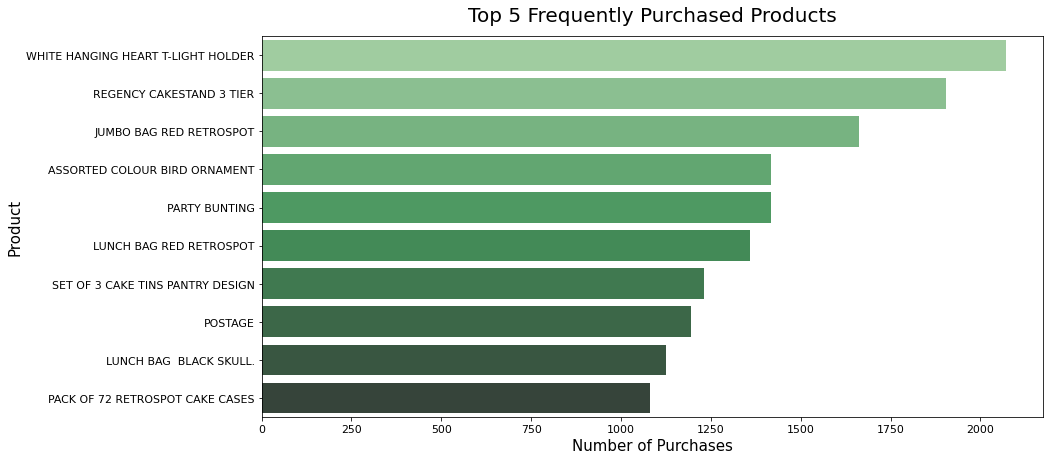

In [18]:
plt.figure(figsize = (14,7))
ax = sns.countplot(y = df['Description'], 
                   order = df["Description"].value_counts().iloc[:10].index, 
                   palette = "Greens_d")
ax.set_title("Top 5 Frequently Purchased Products", size = 20, pad=15)
ax.set_xlabel("Number of Purchases", size = 15) # Changed x-axis label
ax.set_ylabel("Product", size = 15)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
plt.show()



<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- Customers tend to purchase the **`white hanging heart t-light holder`** **more frequently** than any other product.
    
</p>
</div>

### 2.How many orders (per hour)?

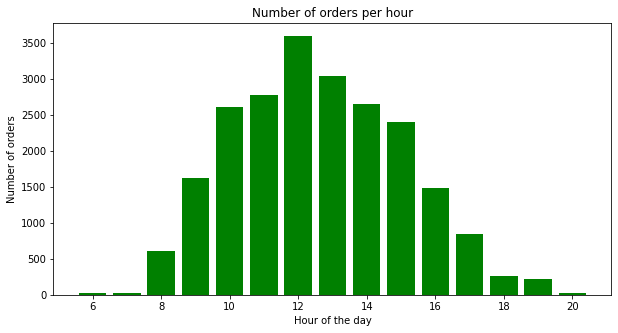

In [19]:
# Convert the InvoiceDate column to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the hour from InvoiceDate column
df['Hour'] = df['InvoiceDate'].dt.hour

# Count the number of unique orders for each hour
hourly_orders = df.groupby('Hour')['InvoiceNo'].nunique()

# Visualize the results
plt.figure(figsize=(10,5))
plt.bar(hourly_orders.index, hourly_orders.values, color='green')
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.title('Number of orders per hour')
plt.show()

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- According to the analysis of the data from the online retail store, it was found that the period between **12 PM and 1 PM had the highest number of orders**.
- This could be explained by the fact that **this is the time when many people take a break from work to have their lunch**. During this time, people may also have some free time to browse and make purchases online.
- This finding highlights the potential importance of timing in the online retail business. By understanding when customers are most likely to make purchases, **retailers can optimize their marketing efforts and sales strategies to capture the attention of potential buyers during these peak periods**.
    
</p>
</div>


### 3. How many orders (per day)?

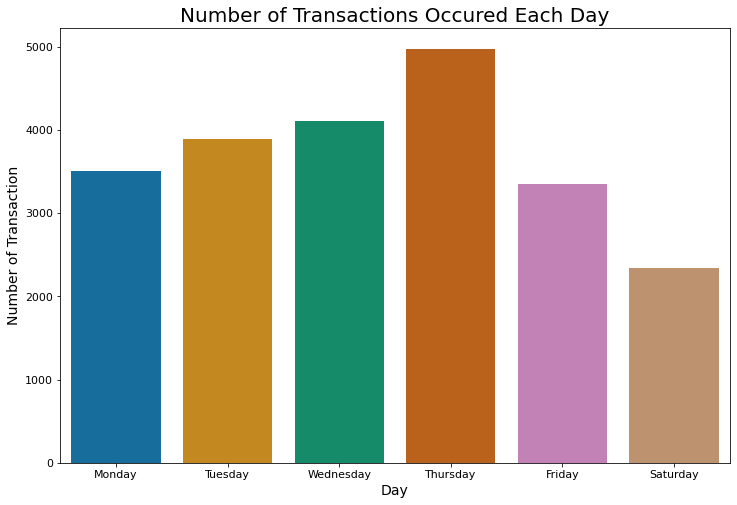

In [20]:
order_day = df.groupby(df['InvoiceDate'].dt.dayofweek)['InvoiceNo'].nunique()

plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'InvoiceDate', y = 'InvoiceNo', data = order_day.reset_index(), palette = "colorblind")
ax.set_title('Number of Transactions Occured Each Day', size = 20)
ax.set_xlabel('Day', size = 14)
ax.set_ylabel('Number of Transaction', size = 14)
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=11)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.show()

<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- According to the data analysis, **Thursday** appears to be the day with the **highest number** of transactions while **Saturday** seems to have the **lowest number** of transactions.
- This observation suggests that the business activity at the online retail is **highest towards the middle of the week** and **decreases towards the end of the week**. 
- It could be hypothesized that **customers are more likely to make purchases during the weekdays** when they are actively engaged in work and other activities, **while on weekends they might prefer to take a break and engage in leisurely activities**.
    
</p>
</div>

### 4. How many orders (per month)?

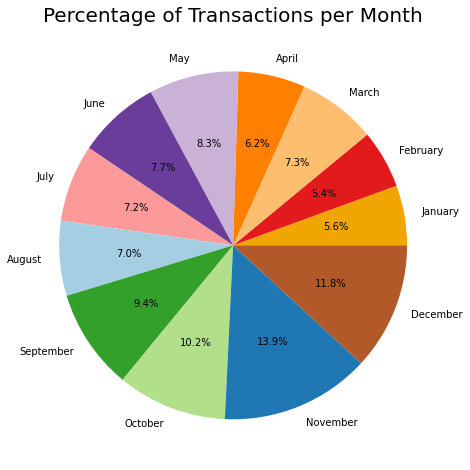

In [21]:
# Calculate the number of transactions per month
order_month = df.groupby(df['InvoiceDate'].dt.month)['InvoiceNo'].nunique()

# Define the labels and colors for the pie chart
labels = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']
colors = ['#f0a500', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a',
          '#fb9a99', '#a6cee3', '#33a02c', '#b2df8a', '#1f78b4', '#b15928']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(order_month.values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Transactions per Month', size=20)
plt.show()


<div class="alert alert-block alert-info"> <h3>📌Observation:</h3> <br>
<p style='color:black;'>

- The data shows that the month with the **highest number of transactions is November**, which is not surprising given that it is a month leading up to the holiday season.
- Many people tend to start their holiday shopping in advance to avoid the last-minute rush and November is an ideal time to do so. Furthermore, November is marked by several festivals and events such as Thanksgiving and Black Friday, which are associated with increased spending. 
- Therefore, the surge in transactions during this month is likely due to a combination of these factors.
    
</p>
</div>


In [22]:
basket = df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



## Encode the data

In [23]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', axis = 1, inplace = True)
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Apriori algorithm

In [24]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [29]:
# Apply Apriori algorithm on the basket_sets with a minimum support of 0.02
#use_colnames is set to True to use the item names as column names in the resulting DataFrame

frequent_itemsets = apriori(basket_sets, min_support = 0.02, use_colnames= True)

In [26]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.039252,0.072105,0.024606,0.626866,8.693843,0.021775,2.486760,0.921132
9,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.072105,0.039252,0.024606,0.341250,8.693843,0.021775,1.458441,0.953745
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.031140,0.035286,0.024380,0.782923,22.187826,0.023282,4.444115,0.985623
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.035286,0.031140,0.024380,0.690932,22.187826,0.023282,3.134782,0.989859
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.035557,0.039522,0.023885,0.671736,16.996386,0.022479,2.925934,0.975862
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.039522,0.035557,0.023885,0.604333,16.996386,0.022479,2.437513,0.979892
17,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.041956,0.058044,0.023569,0.561762,9.678174,0.021134,2.149414,0.935943
16,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.058044,0.041956,0.023569,0.406056,9.678174,0.021134,1.613021,0.951929
12,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.058044,0.047409,0.023299,0.401398,8.466740,0.020547,1.591359,0.936234
13,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.047409,0.058044,0.023299,0.491445,8.466740,0.020547,1.852220,0.925781


In [27]:
# This line of code filters the association rules that have a lift value greater than or equal to 6 and a confidence value greater than or equal to 0.8. The resulting rules are considered to be strong associations between items.

rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025056,0.03114,0.02073,0.827338,26.56821,0.01995,5.611313,0.987094


-------------------------
<div class="alert alert-block alert-info" style='background-color: #daf7d5;'>
    <h3 style='font-size: 21px;'>📌Conclusion:</h3> 
    <br>
    <p style='font-size: 15px; color:black;'>
        - Based on the market basket analysis, it is found that there is a strong association between <strong>PINK REGENCY TEACUP AND SAUCER</strong> and <strong>GREEN REGENCY TEACUP AND SAUCER</strong>. 
        <br>
        - This indicates that customers who buy one of these items tend to buy the other as well. 
        <br>
        - To capitalize on this information, the online retail store could consider providing more color variants for teacup and saucer items, especially those that are frequently associated with <strong>PINK REGENCY TEACUP AND SAUCER</strong> This could potentially increase sales for these items by offering customers a wider range of options to choose from, catering to their preferences and needs.
    </p>
</div>
